<a href="https://colab.research.google.com/github/ayushman-nayak/first/blob/main/ds_module_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
import pandas as pd
import numpy as np


In [224]:
pd.set_option('display.max_columns',None)

In [225]:
df=pd.read_csv('/content/drive/MyDrive/Predicting_future_medical_costs_using_historical_medical_data.csv')
df.head(10)

,xid,medical_costs,age,gender,diabetes_doctor_visits,diabetes_inpatient_visits,hypertension_doctor_visits,hypertension_inpatient_visits,heart_disease_doctor_visits,heart_disease_inpatient_visits,lung_cancer_doctor_visits,lung_cancer_inpatient_visits,breast_cancer_doctor_visits,breast_cancer_inpatient_visits,colorectal_cancer_doctor_visits,colorectal_cancer_inpatient_visits,prostate_cancer_doctor_visits,prostate_cancer_inpatient_visits,orthopedic_doctor_visits,orthopedic_inpatient_visits,chronic_kidney_doctor_visits,chronic_kidney_inpatient_visits,chronic_liver_doctor_visits,chronic_liver_inpatient_visits,asthma_doctor_visits,asthma_inpatient_visits,copd_doctor_visits,copd_inpatient_visits,arthritis_doctor_visits,arthritis_inpatient_visits,stroke_doctor_visits,stroke_inpatient_visits,depression_doctor_visits,depression_inpatient_visits,anxiety_doctor_visits,anxiety_inpatient_visits,obesity_doctor_visits,obesity_inpatient_visits,hyperlipidemia_doctor_visits,hyperlipidemia_inpatient_visits,alzheimers_doctor_visits,alzheimers_inpatient_visits,other_cancer_doctor_visits,other_cancer_inpatient_visits
0,1,4936,69,Male,1,0,3,0,1,2,0,1,0,0,0,0,0,0,1,0,1,0,0,0,2,0,1,0,0,0,0,0,1,0,1,0,3,0,1,0,0,0,0,0
1,2,5945,32,Male,3,1,4,1,4,3,1,0,0,0,0,0,0,0,0,0,1,0,2,0,3,1,0,1,2,0,0,0,0,0,1,0,5,1,0,0,0,0,2,0
2,3,5569,89,Male,2,1,2,3,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,2,0,3,0,4,1,3,0,3,0,1,0
3,4,0,78,Male,1,0,2,0,2,3,0,0,1,0,0,0,0,0,0,1,3,0,0,0,1,0,1,0,0,0,0,0,1,0,2,0,2,0,1,0,0,0,0,0
4,5,8689,38,Female,2,1,1,0,2,0,1,0,0,0,1,0,0,0,1,0,0,2,1,1,0,0,1,0,0,0,0,0,1,0,2,1,3,2,0,0,2,0,0,0
5,6,5733,41,Female,2,0,3,0,2,2,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,3,0,2,0,1,0,0,0,1,0
6,7,2921,20,Male,1,1,5,1,3,2,1,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,3,1,1,0,1,0,0,0
7,8,9317,39,Female,2,1,3,0,0,1,0,0,2,0,0,1,0,2,0,0,0,0,1,0,1,0,1,0,4,0,0,1,0,0,1,0,4,0,0,0,0,0,0,0
8,9,10605,70,Female,8,2,6,3,2,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,1,0,2,1,1,0,1,0,0,0
9,10,6007,19,Male,3,0,1,2,1,3,0,0,1,0,0,0,0,0,2,0,1,0,1,0,0,1,3,0,1,1,0,1,0,0,1,0,2,0,0,0,2,0,1,0


In [226]:
df.columns

Index(['xid', 'medical_costs', 'age', 'gender', 'diabetes_doctor_visits',
       'diabetes_inpatient_visits', 'hypertension_doctor_visits',
       'hypertension_inpatient_visits', 'heart_disease_doctor_visits',
       'heart_disease_inpatient_visits', 'lung_cancer_doctor_visits',
       'lung_cancer_inpatient_visits', 'breast_cancer_doctor_visits',
       'breast_cancer_inpatient_visits', 'colorectal_cancer_doctor_visits',
       'colorectal_cancer_inpatient_visits', 'prostate_cancer_doctor_visits',
       'prostate_cancer_inpatient_visits', 'orthopedic_doctor_visits',
       'orthopedic_inpatient_visits', 'chronic_kidney_doctor_visits',
       'chronic_kidney_inpatient_visits', 'chronic_liver_doctor_visits',
       'chronic_liver_inpatient_visits', 'asthma_doctor_visits',
       'asthma_inpatient_visits', 'copd_doctor_visits',
       'copd_inpatient_visits', 'arthritis_doctor_visits',
       'arthritis_inpatient_visits', 'stroke_doctor_visits',
       'stroke_inpatient_visits', 'depre

In [227]:
df.shape

(10000, 44)

In [228]:
import seaborn as sns

<Axes: ylabel='age'>

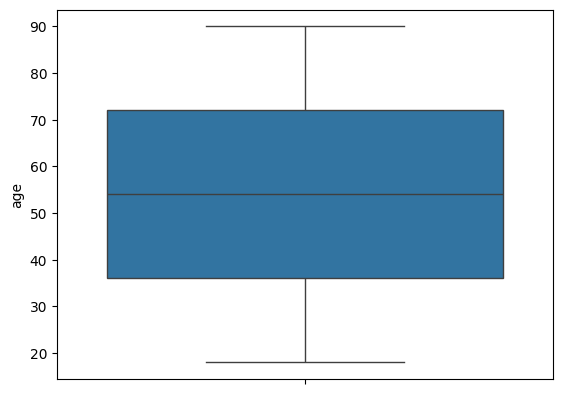

In [229]:
sns.boxplot(df['age'])

In [230]:
np.quantile(df['age'],[0.25,0.5,0.75])

array([36., 54., 72.])

In [231]:
df.isna().sum()

,0
xid,0
medical_costs,0
age,0
gender,0
diabetes_doctor_visits,0
diabetes_inpatient_visits,0
hypertension_doctor_visits,0
hypertension_inpatient_visits,0
heart_disease_doctor_visits,0
heart_disease_inpatient_visits,0


In [232]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import seaborn as sns

In [233]:
df.drop(['xid', 'gender'], axis=1, inplace=True)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   medical_costs                       10000 non-null  int64
 1   age                                 10000 non-null  int64
 2   diabetes_doctor_visits              10000 non-null  int64
 3   diabetes_inpatient_visits           10000 non-null  int64
 4   hypertension_doctor_visits          10000 non-null  int64
 5   hypertension_inpatient_visits       10000 non-null  int64
 6   heart_disease_doctor_visits         10000 non-null  int64
 7   heart_disease_inpatient_visits      10000 non-null  int64
 8   lung_cancer_doctor_visits           10000 non-null  int64
 9   lung_cancer_inpatient_visits        10000 non-null  int64
 10  breast_cancer_doctor_visits         10000 non-null  int64
 11  breast_cancer_inpatient_visits      10000 non-null  int64
 12  color

In [235]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'correlation of features with medical costs')

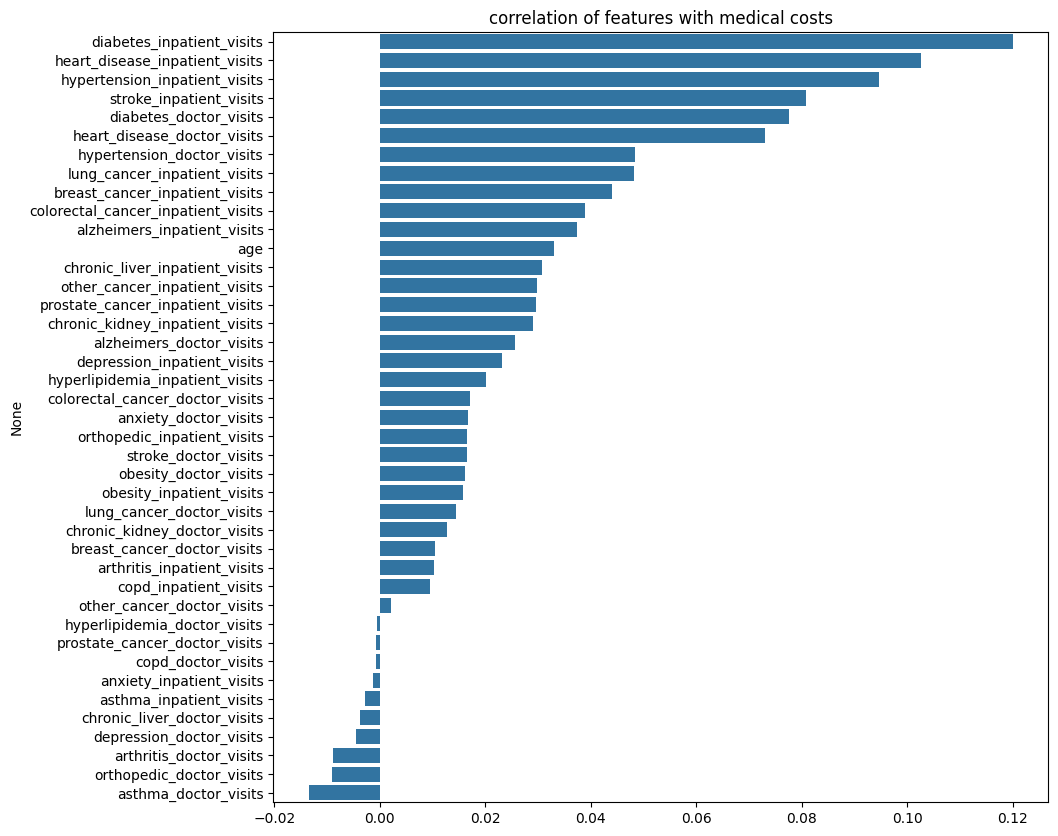

In [236]:
corr_mat = df.corr()
target_corr = corr_mat['medical_costs'].drop('medical_costs')
target_corr = target_corr.sort_values(ascending=False)
#target_corr
#plot
plt.figure(figsize=(10,10))
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.title("correlation of features with medical costs")


In [237]:
#train-test split and baseline model analysis :
x=df.drop('medical_costs',axis=1)
y=df['medical_costs']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [238]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

<Axes: >

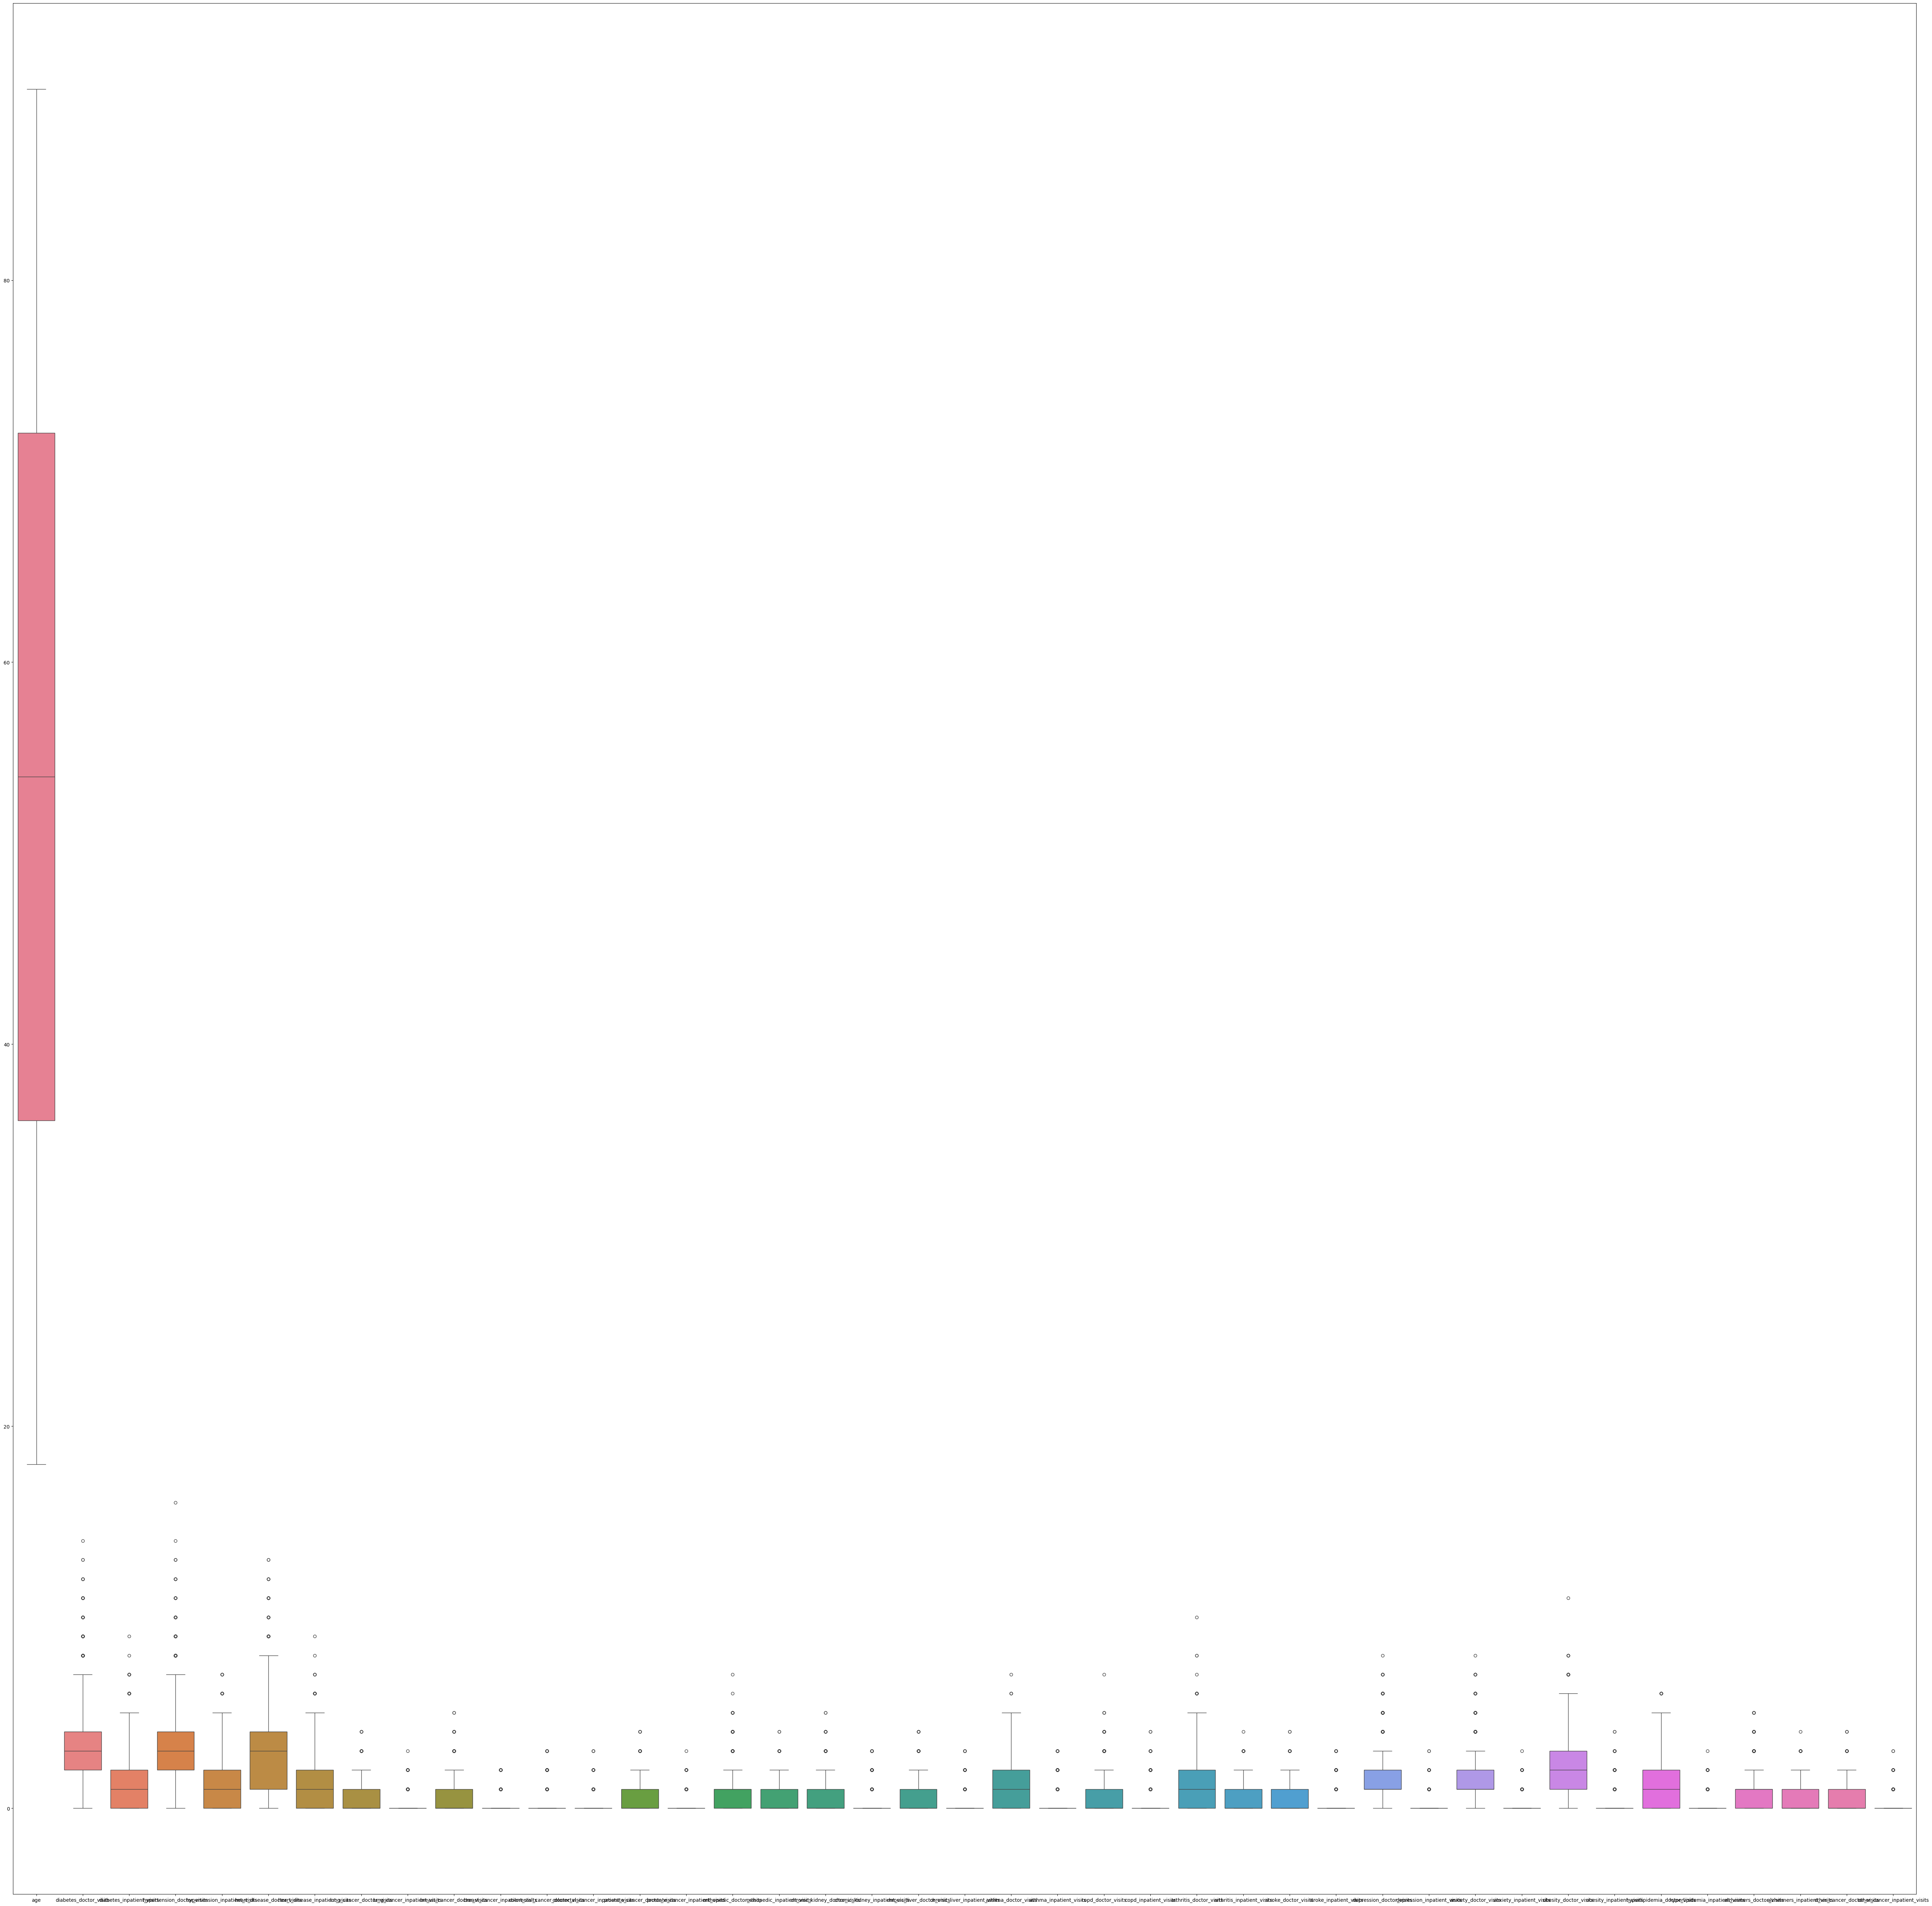

In [239]:
#boxplot for all numerical features :
plt.figure(figsize=(70,70))
sns.boxplot(data=x)

In [240]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

3110.552568733782
103884124.006052
0.048224893855050244


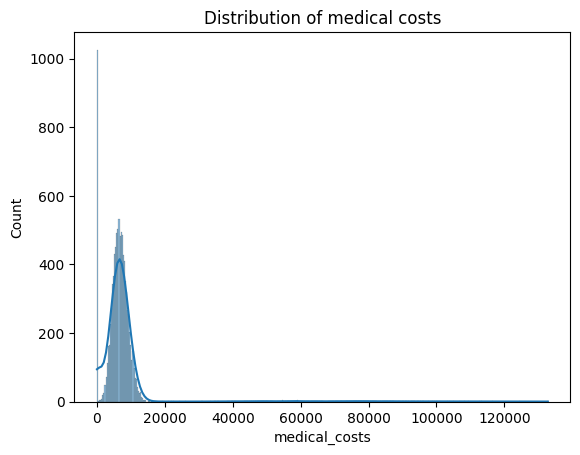

In [241]:
sns.histplot(df['medical_costs'],kde=True)
plt.title("Distribution of medical costs")
plt.show()

In [242]:
df['medical_costs'].describe()

,medical_costs
count,10000.00000
mean,7427.39030
std,9842.58626
min,0.00000
25%,4760.00000
50%,6492.00000
75%,8182.00000
max,132801.00000


In [243]:
count_above_20000 = df[df['medical_costs'] == 0].shape[0]
print(f"Number of datapoints with medical costs below 20,000: {count_above_20000}")

Number of datapoints with medical costs below 20,000: 1026


In [244]:
df['medical_costs'].describe()

,medical_costs
count,10000.00000
mean,7427.39030
std,9842.58626
min,0.00000
25%,4760.00000
50%,6492.00000
75%,8182.00000
max,132801.00000


so, 1026 out of the 10000 records have 0 medical cost.

In [245]:
iqr_top = np.quantile(df['medical_costs'],0.75) + 1.5*(np.quantile(df['medical_costs'],0.75) - np.quantile(df['medical_costs'],0.25))
print(iqr_top)

13315.0


In [246]:
iqr_bottom = np.quantile(df['medical_costs'],0.25) - 1.5*(np.quantile(df['medical_costs'],0.75) - np.quantile(df['medical_costs'],0.25))
print(iqr_bottom)

-373.0


In [247]:
print((df[df['medical_costs'] < iqr_top]).shape)

(9768, 42)


In [248]:
df_clipped = df[(df['medical_costs'] < iqr_top) & (df['medical_costs'] > 0)]
df = df_clipped

In [249]:
df.shape

(8742, 42)

NOW let us try editing the thing

In [250]:
X = df.drop(columns=['medical_costs'])
y = df['medical_costs']

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

In [252]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [253]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def wmape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true)) * 100

In [254]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Testing MAE:", mean_absolute_error(y_test, y_test_pred))
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Testing RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Training R2:", r2_score(y_train, y_train_pred))
print("Testing R2:", r2_score(y_test, y_test_pred))
print("Training Mape", mape(y_train, y_train_pred))
print("Testing Mape", mape(y_test, y_test_pred))
print("Training Wmape", wmape(y_train, y_train_pred))
print("Testing Wmape", wmape(y_test, y_test_pred))

Training MAE: 806.5910966313994
Testing MAE: 806.2953247837426
Training RMSE: 1010.0869452432404
Testing RMSE: 1007.1066228256719
Training R2: 0.7793251525201101
Testing R2: 0.7745807016024847
Training Mape 13.908725153985205
Testing Mape 13.769909579162794
Training Wmape 11.78867329713211
Testing Wmape 11.743514741325635


In [255]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# X = df.drop(columns=['medical_costs'])
# y = df['medical_costs']
# def remove_high_vif_features(X, thresh=10):
#     while True:
#         vif_df = pd.DataFrame()
#         vif_df["feature"] = X.columns
#         vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#         max_vif = vif_df["VIF"].max()
#         if max_vif > thresh:
#             drop_feature = vif_df.sort_values("VIF", ascending=False)["feature"].iloc[0]
#             print(f"Removing '{drop_feature}' with VIF={max_vif:.2f}")
#             X = X.drop(columns=[drop_feature])
#         else:
#             break
#     return X

# # 5. Apply VIF Reduction
# X = remove_high_vif_features(X, thresh=10)

In [256]:
coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coeffs)


                               Feature  Coefficient
28             stroke_inpatient_visits  1522.306074
12  colorectal_cancer_inpatient_visits  1094.338836
40       other_cancer_inpatient_visits  1055.466201
14    prostate_cancer_inpatient_visits  1024.979263
10      breast_cancer_inpatient_visits  1018.046938
8         lung_cancer_inpatient_visits  1002.984035
18     chronic_kidney_inpatient_visits   638.476641
20      chronic_liver_inpatient_visits   618.112803
38         alzheimers_inpatient_visits   598.988559
6       heart_disease_inpatient_visits   586.996087
2            diabetes_inpatient_visits   495.045654
4        hypertension_inpatient_visits   403.262337
16         orthopedic_inpatient_visits   310.842329
30         depression_inpatient_visits   292.086431
27                stroke_doctor_visits   287.707507
32            anxiety_inpatient_visits   272.225477
39          other_cancer_doctor_visits   264.222742
24               copd_inpatient_visits   225.781456
11     color

In [257]:
#RIDGE
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
ridge_params = {'alpha': np.logspace(-4, 4, 50)}
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-02, 1....
       8.28642773e-01, 1.20679264e+00, 1.75751062e+00, 2.55954792e+00,
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])},
             scoring='r2')

In [258]:
#LASSO
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter=10000)
lasso_params = {'alpha': np.logspace(-4, 1, 50)}
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': array([1.00000000e-04, 1.26485522e-04, 1.59985872e-04, 2.02358965e-04,
       2.55954792e-04, 3.23745754e-04, 4.09491506e-04, 5.17947468e-04,
       6.55128557e-04, 8.28642773e-04, 1.04811313e-03, 1.32571137e-03,
       1.67683294e-03, 2.12095089e-03, 2.68269580e-03, 3.39322177e-03,
       4.29193426e-03, 5.42867544e-03, 6.8...
       2.81176870e-02, 3.55648031e-02, 4.49843267e-02, 5.68986603e-02,
       7.19685673e-02, 9.10298178e-02, 1.15139540e-01, 1.45634848e-01,
       1.84206997e-01, 2.32995181e-01, 2.94705170e-01, 3.72759372e-01,
       4.71486636e-01, 5.96362332e-01, 7.54312006e-01, 9.54095476e-01,
       1.20679264e+00, 1.52641797e+00, 1.93069773e+00, 2.44205309e+00,
       3.08884360e+00, 3.90693994e+00, 4.94171336e+00, 6.25055193e+00,
       7.90604321e+00, 1.00000000e+01])},
             scoring='r2')

In [259]:
#ELASTICNET
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(max_iter=10000)
elastic_params = {
    'alpha': np.logspace(-4, 1, 30),
    'l1_ratio': np.linspace(0.1, 1.0, 10)
}
elastic_cv = GridSearchCV(elastic, elastic_params, cv=5, scoring='r2')
elastic_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': array([1.00000000e-04, 1.48735211e-04, 2.21221629e-04, 3.29034456e-04,
       4.89390092e-04, 7.27895384e-04, 1.08263673e-03, 1.61026203e-03,
       2.39502662e-03, 3.56224789e-03, 5.29831691e-03, 7.88046282e-03,
       1.17210230e-02, 1.74332882e-02, 2.59294380e-02, 3.85662042e-02,
       5.73615251e-02, 8.53167852e-02, 1.26896100e-01, 1.88739182e-01,
       2.80721620e-01, 4.17531894e-01, 6.21016942e-01, 9.23670857e-01,
       1.37382380e+00, 2.04335972e+00, 3.03919538e+00, 4.52035366e+00,
       6.72335754e+00, 1.00000000e+01]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='r2')

In [260]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error
models = {
    "Ridge": ridge_cv.best_estimator_,
    "Lasso": lasso_cv.best_estimator_,
    "ElasticNet": elastic_cv.best_estimator_
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} R²: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} MAPE: {mean_absolute_percentage_error(y_test, y_pred):.4f}")


Ridge R²: 0.7746
Ridge MAPE: 0.1377
Lasso R²: 0.7746
Lasso MAPE: 0.1377
ElasticNet R²: 0.7746
ElasticNet MAPE: 0.1377


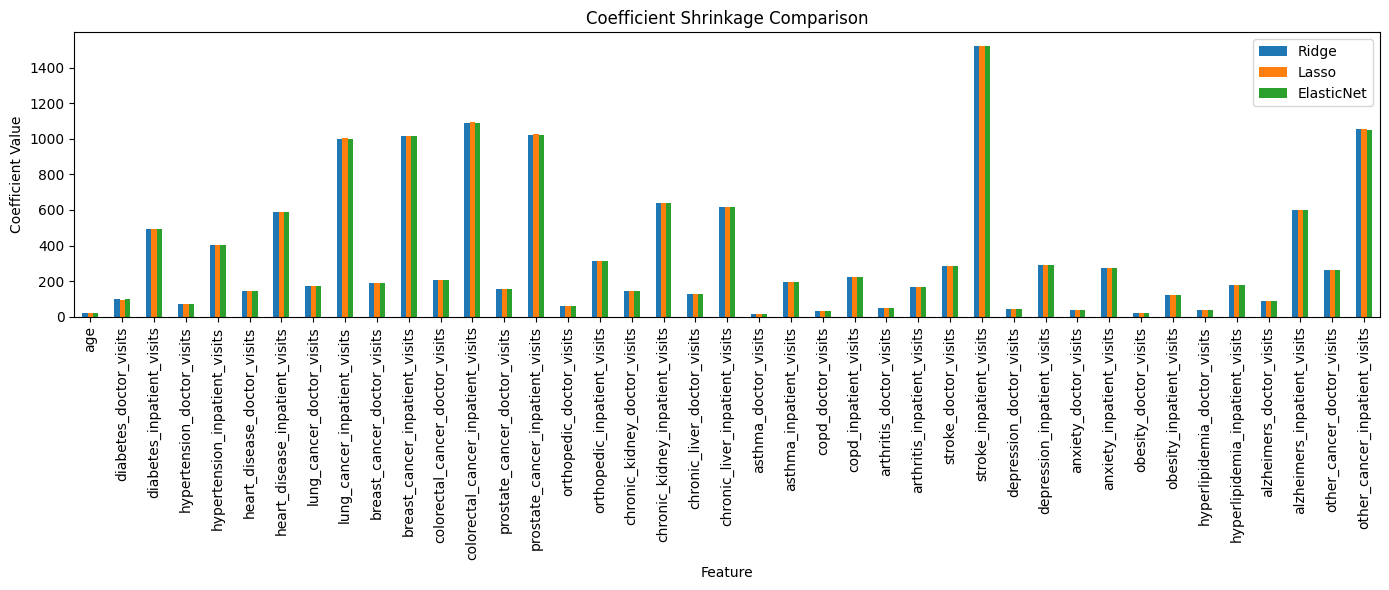

In [261]:
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Ridge": ridge_cv.best_estimator_.coef_,
    "Lasso": lasso_cv.best_estimator_.coef_,
    "ElasticNet": elastic_cv.best_estimator_.coef_
})
coef_df.set_index("Feature").plot(kind="bar", figsize=(14, 6))
plt.title("Coefficient Shrinkage Comparison")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

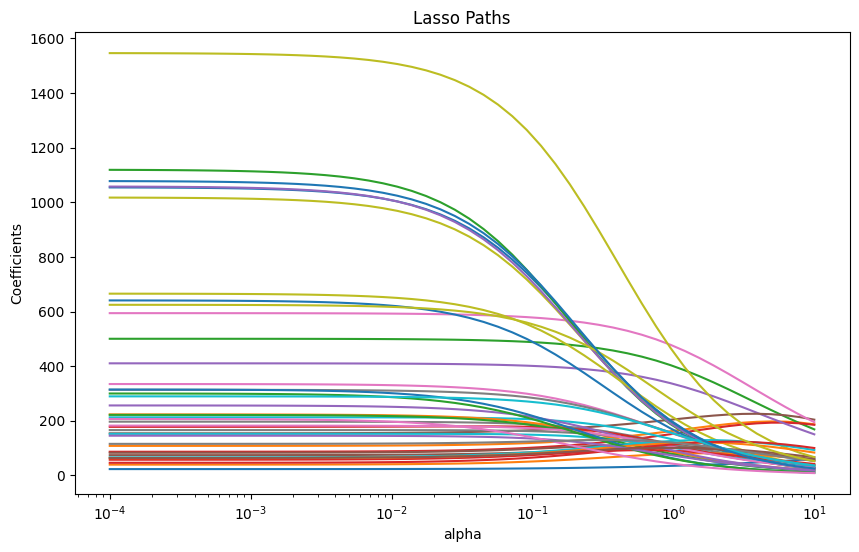

In [262]:
alphas, coefs, _ = lasso.path(X_train, y_train, alphas=np.logspace(-4, 1, 50))
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs.T)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Paths')
plt.axis('tight')
plt.show()

Comparison of significant variables :


---



In [267]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_coefs = pd.Series(lr.coef_, index=X_train.columns)
lr_coefs.sort_values(ascending=False, inplace=True)
print(lr_coefs)

stroke_inpatient_visits               1522.306074
colorectal_cancer_inpatient_visits    1094.338836
other_cancer_inpatient_visits         1055.466201
prostate_cancer_inpatient_visits      1024.979263
breast_cancer_inpatient_visits        1018.046938
lung_cancer_inpatient_visits          1002.984035
chronic_kidney_inpatient_visits        638.476641
chronic_liver_inpatient_visits         618.112803
alzheimers_inpatient_visits            598.988559
heart_disease_inpatient_visits         586.996087
diabetes_inpatient_visits              495.045654
hypertension_inpatient_visits          403.262337
orthopedic_inpatient_visits            310.842329
depression_inpatient_visits            292.086431
stroke_doctor_visits                   287.707507
anxiety_inpatient_visits               272.225477
other_cancer_doctor_visits             264.222742
copd_inpatient_visits                  225.781456
colorectal_cancer_doctor_visits        204.598138
asthma_inpatient_visits                197.813104


In [268]:
lasso_coefs = pd.Series(lasso_cv.best_estimator_.coef_, index=X_train.columns)
lasso_coefs.sort_values(ascending = False, inplace=True)
print(lasso_coefs)

stroke_inpatient_visits               1522.305539
colorectal_cancer_inpatient_visits    1094.337728
other_cancer_inpatient_visits         1055.465122
prostate_cancer_inpatient_visits      1024.978135
breast_cancer_inpatient_visits        1018.045873
lung_cancer_inpatient_visits          1002.983098
chronic_kidney_inpatient_visits        638.476133
chronic_liver_inpatient_visits         618.112136
alzheimers_inpatient_visits            598.988215
heart_disease_inpatient_visits         586.996033
diabetes_inpatient_visits              495.045603
hypertension_inpatient_visits          403.262269
orthopedic_inpatient_visits            310.841986
depression_inpatient_visits            292.085382
stroke_doctor_visits                   287.707163
anxiety_inpatient_visits               272.224452
other_cancer_doctor_visits             264.222446
copd_inpatient_visits                  225.780886
colorectal_cancer_doctor_visits        204.597627
asthma_inpatient_visits                197.812550


In [269]:
ridge_coefs = pd.Series(ridge_cv.best_estimator_.coef_, index=X_train.columns)
ridge_coefs.sort_values(ascending = False, inplace=True)
print(ridge_coefs)

stroke_inpatient_visits               1520.188153
colorectal_cancer_inpatient_visits    1091.062479
other_cancer_inpatient_visits         1052.633223
prostate_cancer_inpatient_visits      1022.059328
breast_cancer_inpatient_visits        1015.294092
lung_cancer_inpatient_visits          1000.425005
chronic_kidney_inpatient_visits        637.577682
chronic_liver_inpatient_visits         616.947891
alzheimers_inpatient_visits            598.452731
heart_disease_inpatient_visits         586.864720
diabetes_inpatient_visits              494.950587
hypertension_inpatient_visits          403.172274
orthopedic_inpatient_visits            310.498992
depression_inpatient_visits            291.275379
stroke_doctor_visits                   287.421985
anxiety_inpatient_visits               271.398279
other_cancer_doctor_visits             264.002200
copd_inpatient_visits                  225.384765
colorectal_cancer_doctor_visits        204.342111
asthma_inpatient_visits                197.470549


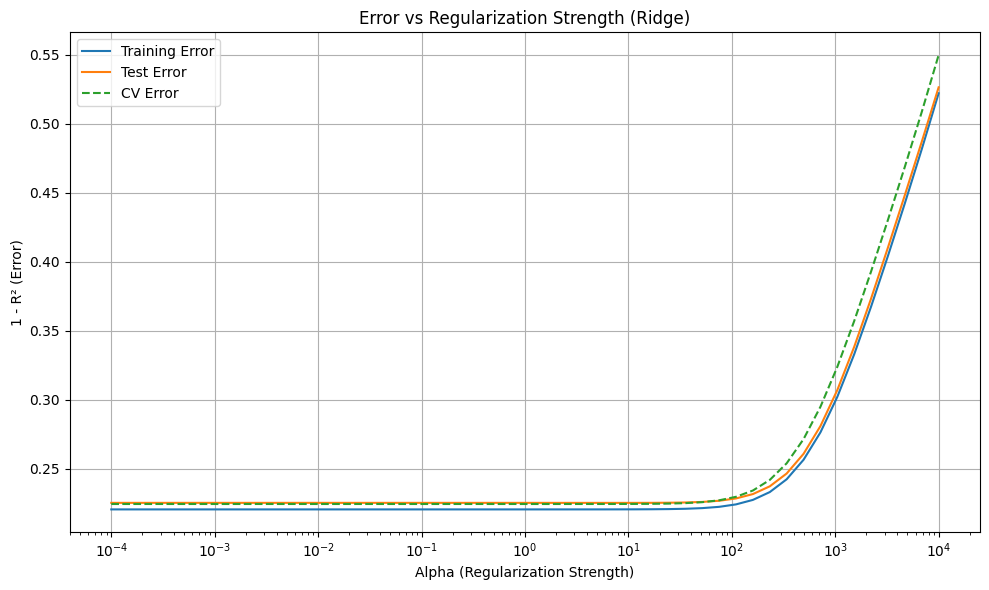

In [270]:
alphas = np.logspace(-4, 4, 50)
train_errors, test_errors, cv_errors = [], [], []

from sklearn.model_selection import cross_val_score

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)

    # Training error
    y_train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)

    # Test error
    y_test_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)

    # CV error (negated because scikit-learn returns negative scores for consistency)
    cv_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()

    train_errors.append(1 - train_r2)
    test_errors.append(1 - test_r2)
    cv_errors.append(1 - cv_r2)

# Plot it
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label="Training Error")
plt.plot(alphas, test_errors, label="Test Error")
plt.plot(alphas, cv_errors, label="CV Error", linestyle="--")
plt.xscale("log")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("1 - R² (Error)")
plt.title("Error vs Regularization Strength (Ridge)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

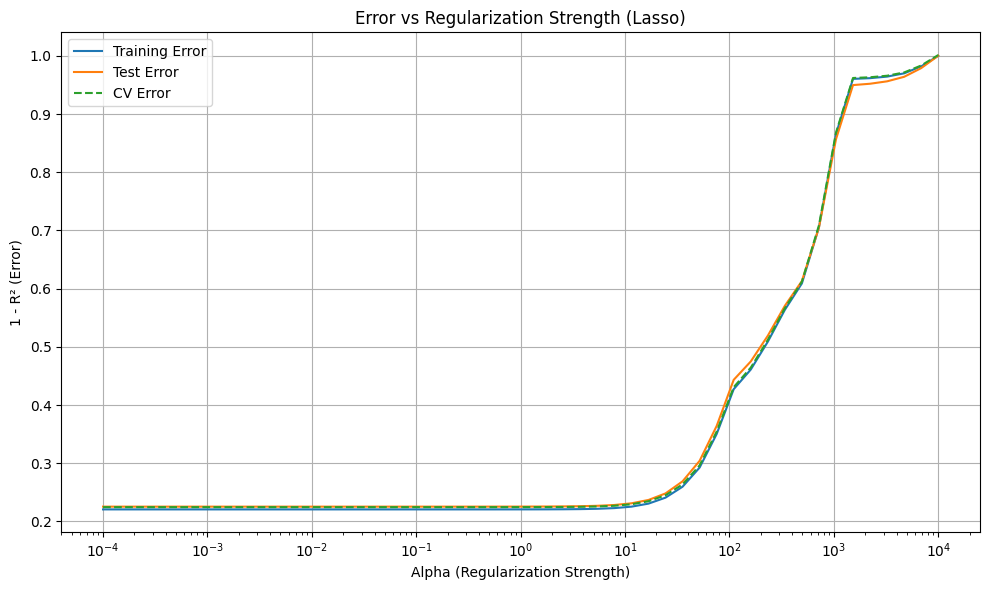

In [272]:
alphas = np.logspace(-4, 4, 50)
train_errors, test_errors, cv_errors = [], [], []

from sklearn.model_selection import cross_val_score

for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)

    # Training error
    y_train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)

    # Test error
    y_test_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)

    # CV error (negated because scikit-learn returns negative scores for consistency)
    cv_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()

    train_errors.append(1 - train_r2)
    test_errors.append(1 - test_r2)
    cv_errors.append(1 - cv_r2)

# Plot it
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label="Training Error")
plt.plot(alphas, test_errors, label="Test Error")
plt.plot(alphas, cv_errors, label="CV Error", linestyle="--")
plt.xscale("log")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("1 - R² (Error)")
plt.title("Error vs Regularization Strength (Lasso)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

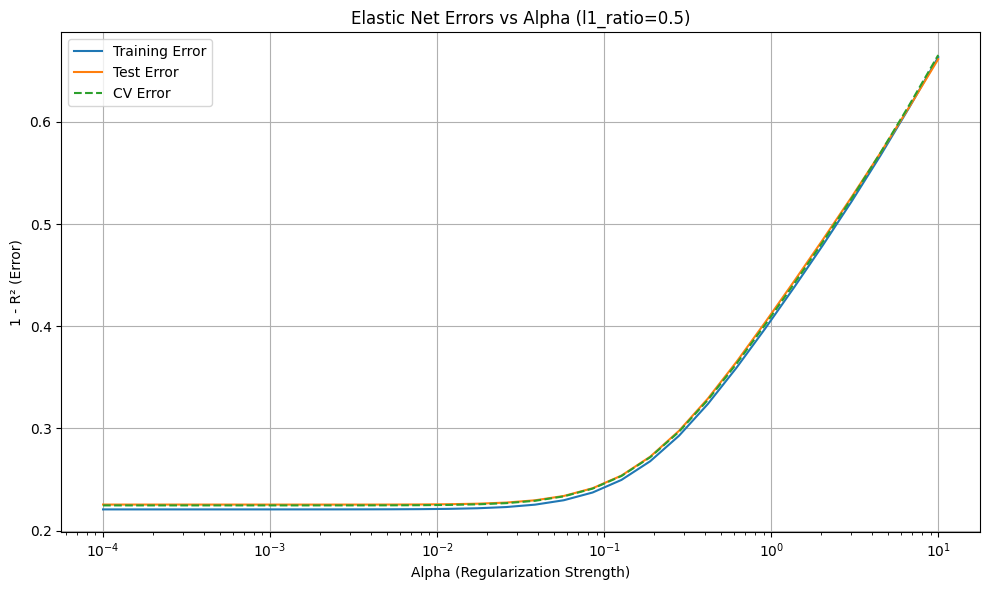

In [273]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

alphas = np.logspace(-4, 1, 30)  # Range of alpha values
l1_ratio_fixed = 0.5  # Fix l1_ratio (0 = Ridge, 1 = Lasso)

train_errors = []
test_errors = []
cv_errors = []

for alpha in alphas:
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio_fixed, max_iter=10000)
    model.fit(X_train, y_train)

    # Training error
    train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, train_pred)
    train_errors.append(1 - train_r2)

    # Test error
    test_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, test_pred)
    test_errors.append(1 - test_r2)

    # CV error
    cv_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()
    cv_errors.append(1 - cv_r2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label="Training Error")
plt.plot(alphas, test_errors, label="Test Error")
plt.plot(alphas, cv_errors, label="CV Error", linestyle='--')

plt.xscale('log')
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("1 - R² (Error)")
plt.title(f"Elastic Net Errors vs Alpha (l1_ratio={l1_ratio_fixed})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [271]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = pd.DataFrame(X_train, columns=X_train.columns)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data.sort_values(by="VIF", ascending=False))

                               Feature       VIF
0                                  age  5.733001
3           hypertension_doctor_visits  3.922810
1               diabetes_doctor_visits  3.704814
5          heart_disease_doctor_visits  3.528134
33               obesity_doctor_visits  2.847905
29            depression_doctor_visits  2.411193
31               anxiety_doctor_visits  2.282168
6       heart_disease_inpatient_visits  2.216643
4        hypertension_inpatient_visits  2.163127
2            diabetes_inpatient_visits  2.148705
25             arthritis_doctor_visits  2.109069
21                asthma_doctor_visits  1.932351
35        hyperlipidemia_doctor_visits  1.916266
15            orthopedic_doctor_visits  1.749221
37            alzheimers_doctor_visits  1.665300
23                  copd_doctor_visits  1.573476
17        chronic_kidney_doctor_visits  1.482181
19         chronic_liver_doctor_visits  1.387585
9          breast_cancer_doctor_visits  1.369585
16         orthopedi